<a href="https://colab.research.google.com/github/muhajirakbarhsb/NLP_class_2023/blob/main/Week_Class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week Class 2


## Get Data

In [1]:
!pip install google_play_scraper

In [2]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [5]:
result = reviews_all(
        'com.myorbit',
        sleep_milliseconds=0, # defaults to 0
        lang='id', # defaults to 'en'
        country='id', # defaults to 'us'
        sort=Sort.NEWEST
    )

df = pd.DataFrame.from_records(result)
df = df[['at', 'content', 'score', 'userName']]

In [6]:
df['at'] = pd.to_datetime(df['at'])

# Filter rows based on the condition: Timestamp >= '2023-01-01'
filtered_df = df[df['at'] >= '2023-01-01']

In [7]:
filtered_df

,at,content,score,userName
0,2023-09-12 02:37:42,Kenapa setiap klik menu perangkat terhubung or...,1,Ari Priatna
1,2023-09-11 23:13:37,"masih banyak bug nya, harga paket Makin lama m...",3,Lufti Ramadhan
2,2023-09-11 16:38:30,"Tsel orbit sangat mengecewakan, isi paket 100g...",1,Media Ibnu hajar Al asqolani
3,2023-09-11 13:07:30,Pembelian paket tidak muncul karna harus pilih...,1,Hellena Sabrina
4,2023-09-11 12:53:46,Abang2 dev. Kok pas buka perangkat yang terhub...,4,septian manda
...,...,...,...,...
3021,2023-01-01 08:28:28,Internet jelek,1,Rafael
3022,2023-01-01 07:54:02,Pilihan Menu pembelian paket nya gak ada.. gan...,5,Rahmat Samsudin
3023,2023-01-01 06:10:55,Sekarang gak bisa beli kuota 100gb... cuma ada...,1,aby habibie
3024,2023-01-01 02:48:24,Saya sudah pakai orbit hampir 1thn tapi kemari...,5,Azkayrah Zahwa


## Text PreProcessing

In [8]:
!pip install nltk
!pip install sastrawi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


### Case Folding

In [9]:
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
lower_case = kalimat.lower()
print(lower_case)


berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah korea selatan, jepang, singapura, hong kong, dan finlandia.


In [14]:
import re # regular exoression modul
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
hasil = re.sub(r"\d+",'', kalimat)
print(hasil)

Berikut ini adalah  negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia.


In [16]:
import string
kalimat = "Ini &adalah [contoh] kalimat? {dengan} tanda. baca?!!"
hasil = kalimat.translate(str.maketrans("","",string.punctuation))
print(hasil)


Ini adalah contoh kalimat dengan tanda baca


In [19]:
kalimat = " \t ini kalimat contoh\t "
hasil = kalimat.strip()
print(kalimat)
print(hasil)

 	 ini kalimat contoh	 
ini kalimat contoh


In [24]:
kalimat = "rumah idaman adalah rumah yang bersih."
pisah = kalimat.split()
print(pisah)

['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih']


### Word Tokenize

In [26]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')


kalimat = "rumah idaman adalah rumah yang bersih."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
tokens = nltk.tokenize.word_tokenize(kalimat)
print(tokens)

['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih']


In [28]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())


[('andi', 2), ('online', 2), ('kerap', 1), ('melakukan', 1), ('transaksi', 1), ('rutin', 1), ('secara', 1), ('daring', 1), ('atau', 1), ('menurut', 1), ('belanja', 1), ('lebih', 1), ('praktis', 1), ('murah', 1)]


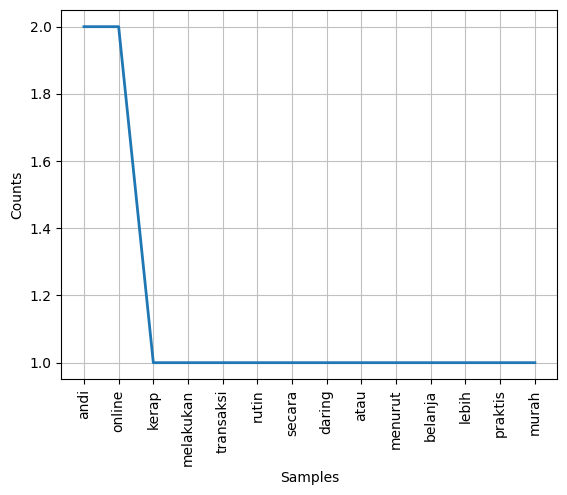

In [29]:
import matplotlib.pyplot as plt
kemunculan.plot(30,cumulative=False)
plt.show()

In [30]:
from nltk.tokenize import sent_tokenize
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."

tokens = nltk.tokenize.sent_tokenize(kalimat)
print(tokens)

['Andi kerap melakukan transaksi rutin secara daring atau online.', 'Menurut Andi belanja online lebih praktis & murah.']


### Stopwords

In [32]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = word_tokenize(kalimat)
listStopword =  set(stopwords.words('indonesian'))

removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)

print(removed)

['andi', 'kerap', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'praktis', 'murah']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
stop = stopword.remove(kalimat)
tokens = nltk.tokenize.word_tokenize(stop)
print(tokens)

['andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'lebih', 'praktis', 'murah']


In [36]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
import string
import nltk

# Create a factory for the stopword remover
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Define your custom stopwords
custom_stopwords = ["andi"]

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."

# Remove punctuation and convert to lowercase
kalimat = kalimat.translate(str.maketrans('', '', string.punctuation)).lower()

# Apply Sastrawi stopword removal
stop = stopword.remove(kalimat)

# Tokenize the text
tokens = nltk.tokenize.word_tokenize(stop)

# Remove custom stopwords
tokens = [x for x in tokens if x not in custom_stopwords]

print(tokens)

['kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'online', 'belanja', 'online', 'lebih', 'praktis', 'murah']


###Stemmer

In [38]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

kata = ["program", "programs", "programer", "programing", "programers"]

for k in kata:
    print(k, " : ", ps.stem(k))


program  :  program
programs  :  program
programer  :  program
programing  :  program
programers  :  program


In [39]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
hasil = stemmer.stem(kalimat)
print(hasil)

andi kerap laku transaksi rutin cara daring atau online turut andi belanja online lebih praktis murah


In [44]:
filtered_df2 = filtered_df.head(200)
filtered_df2

,at,content,score,userName
0,2023-09-12 02:37:42,Kenapa setiap klik menu perangkat terhubung or...,1,Ari Priatna
1,2023-09-11 23:13:37,"masih banyak bug nya, harga paket Makin lama m...",3,Lufti Ramadhan
2,2023-09-11 16:38:30,"Tsel orbit sangat mengecewakan, isi paket 100g...",1,Media Ibnu hajar Al asqolani
3,2023-09-11 13:07:30,Pembelian paket tidak muncul karna harus pilih...,1,Hellena Sabrina
4,2023-09-11 12:53:46,Abang2 dev. Kok pas buka perangkat yang terhub...,4,septian manda
...,...,...,...,...
195,2023-08-23 13:29:37,Knapa ga bisa ganti pasword aneh elor mulu app...,2,Dindin Purnama1509
196,2023-08-23 06:01:34,"Aplikasi sering logout,, sinyal jg gk stabil i...",1,Eko Aprilianda
197,2023-08-23 03:01:22,"Ini bagaimana, saya sudah login kok tiba2 kelu...",2,Dika _Official
198,2023-08-23 00:32:17,Mantap,5,Bengkel Padepacu


### Case with python with orbit data


In [47]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

filtered_df2['contentp'] = filtered_df2['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
filtered_df2['contentp_clean'] = all_preproc(filtered_df2['contentp'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-47-971aa562494d>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['contentp'] = filtered_df2['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
100%|██████████| 200/200 [00:00<00:00, 6307.51it/s]
<ipython-input-47-971aa562494d>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['contentp_clean'] = all_preproc(filtered_df2['contentp'])


<ipython-input-53-d289ce6d565e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['text_length'] = filtered_df2['contentp_clean'].apply(len)


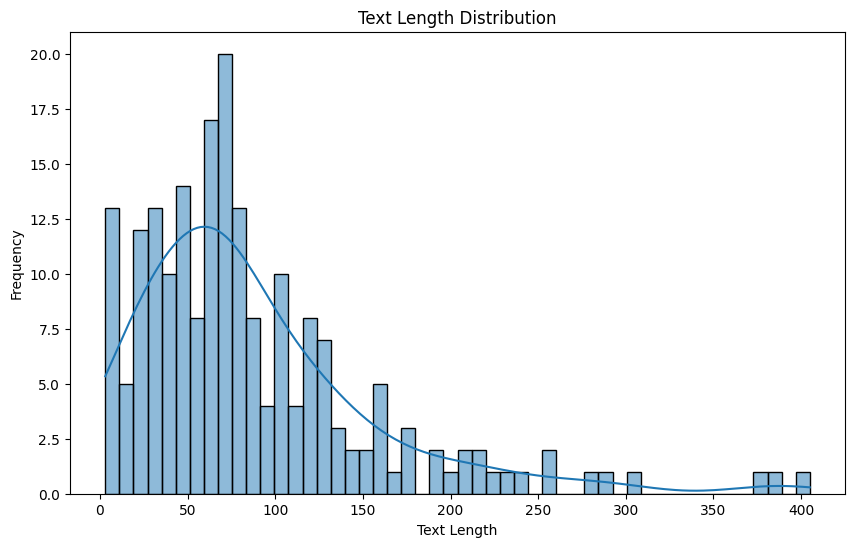

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

filtered_df2['text_length'] = filtered_df2['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df2, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

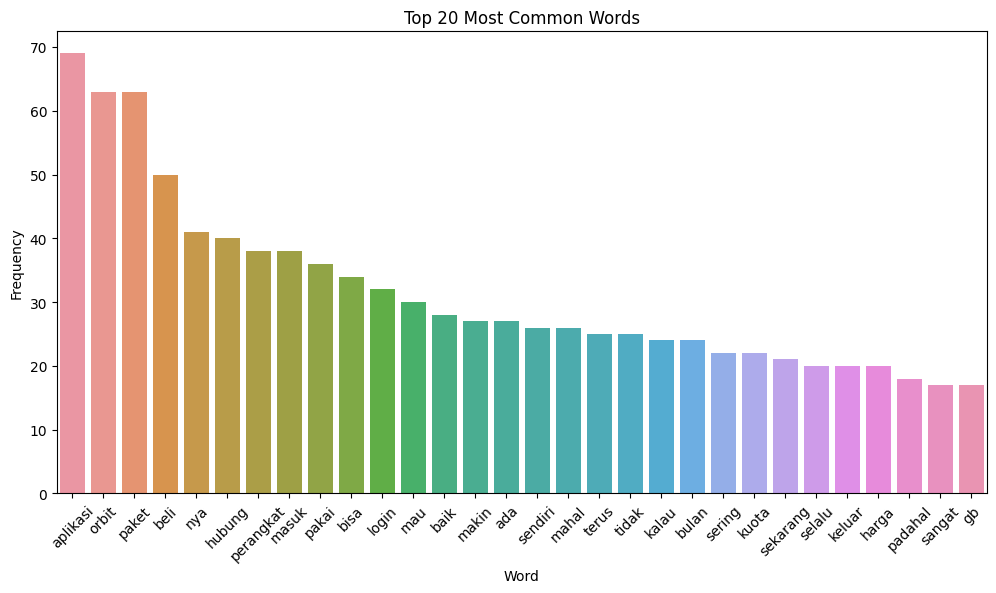

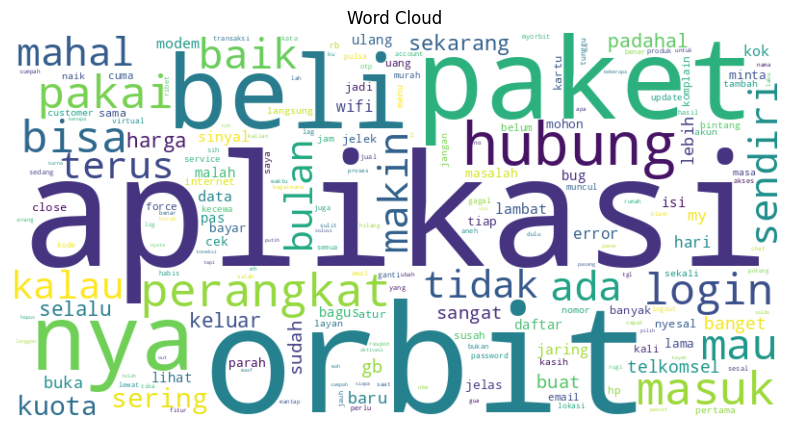

In [54]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(filtered_df2['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 20 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [55]:
filtered_df2

,at,content,score,userName,contentp,contentp_clean,text_length
0,2023-09-12 02:37:42,Kenapa setiap klik menu perangkat terhubung or...,1,Ari Priatna,kenapa setiap klik menu perangkat terhubung or...,tiap klik menu perangkat hubung orbit star sel...,70
1,2023-09-11 23:13:37,"masih banyak bug nya, harga paket Makin lama m...",3,Lufti Ramadhan,masih banyak bug nya harga paket makin lama ma...,banyak bug nya harga paket makin lama makin naik,48
2,2023-09-11 16:38:30,"Tsel orbit sangat mengecewakan, isi paket 100g...",1,Media Ibnu hajar Al asqolani,tsel orbit sangat mengecewakan isi paket gb dg...,tsel orbit sangat kecewa isi paket gb harga rb...,120
3,2023-09-11 13:07:30,Pembelian paket tidak muncul karna harus pilih...,1,Hellena Sabrina,pembelian paket tidak muncul karna harus pilih...,beli paket muncul karna pilih lokasi rumah sed...,72
4,2023-09-11 12:53:46,Abang2 dev. Kok pas buka perangkat yang terhub...,4,septian manda,abang dev kok pas buka perangkat yang terhubun...,abang develop kok pas buka perangkat hubung la...,63
...,...,...,...,...,...,...,...
195,2023-08-23 13:29:37,Knapa ga bisa ganti pasword aneh elor mulu app...,2,Dindin Purnama1509,knapa ga bisa ganti pasword aneh elor mulu app...,tidak ganti pasword aneh elor terus aplikasi n...,88
196,2023-08-23 06:01:34,"Aplikasi sering logout,, sinyal jg gk stabil i...",1,Eko Aprilianda,aplikasi sering logout sinyal jg gk stabil ila...,aplikasi sering logout sinyal tidak stabil ila...,130
197,2023-08-23 03:01:22,"Ini bagaimana, saya sudah login kok tiba2 kelu...",2,Dika _Official,ini bagaimana saya sudah login kok tiba keluar...,bagaimana sudah login kok tiba keluar sendiri ...,143
198,2023-08-23 00:32:17,Mantap,5,Bengkel Padepacu,mantap,mantap,6
